# 1. Analysing data

#### Import the necessary libraries

In [166]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

In [167]:
data=pd.read_csv('../dataset/anemia.csv')

In [168]:
data.tail()
data.head()
len(data)

1421

In [169]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [171]:
data.isnull().sum() 

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

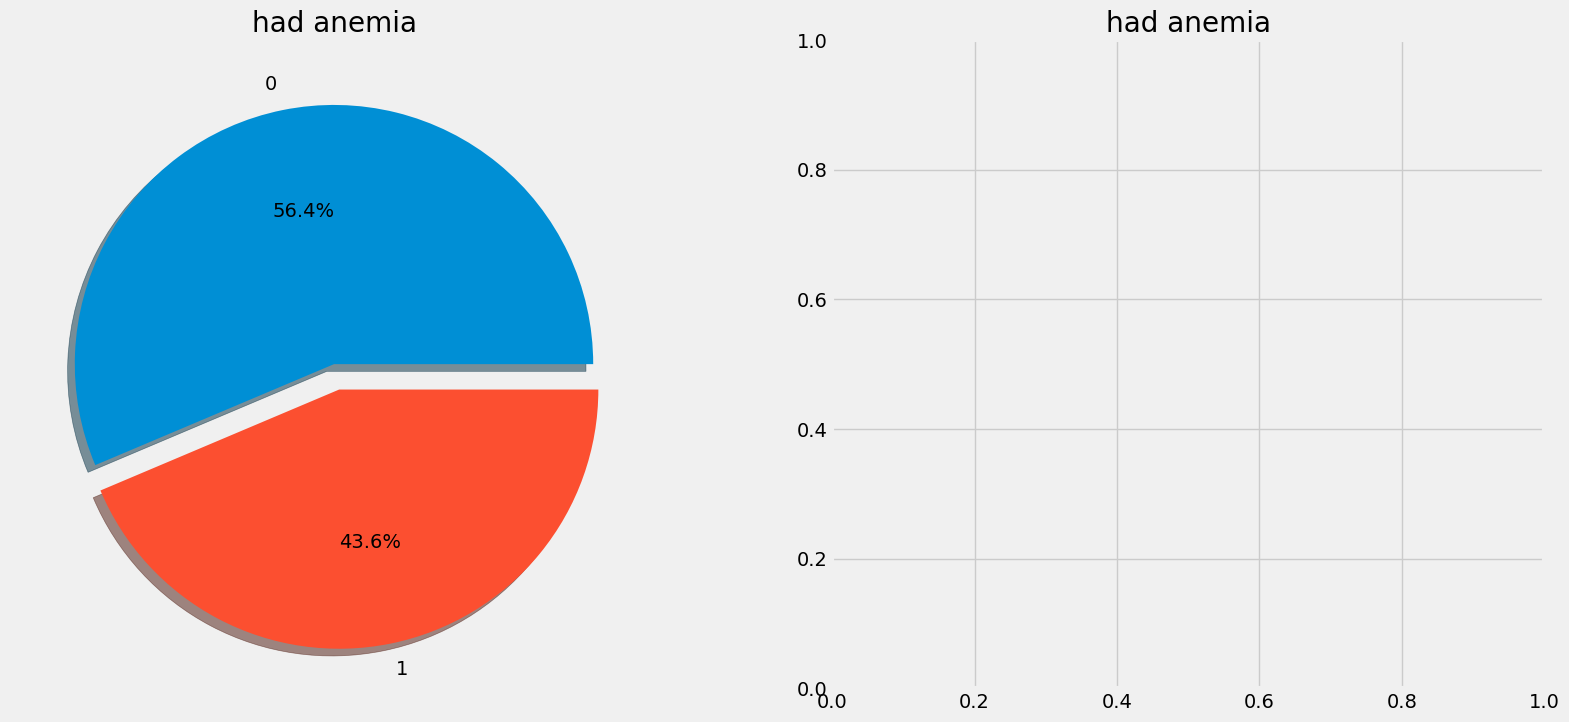

In [172]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had anemia')
ax[0].set_ylabel('')
# sns.countplot('Result',data=data,ax=ax[1])
ax[1].set_title('had anemia')
plt.show()

### Gender dependencies

In [173]:
data.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

# Plotting based on gender

TypeError: countplot() got multiple values for argument 'data'

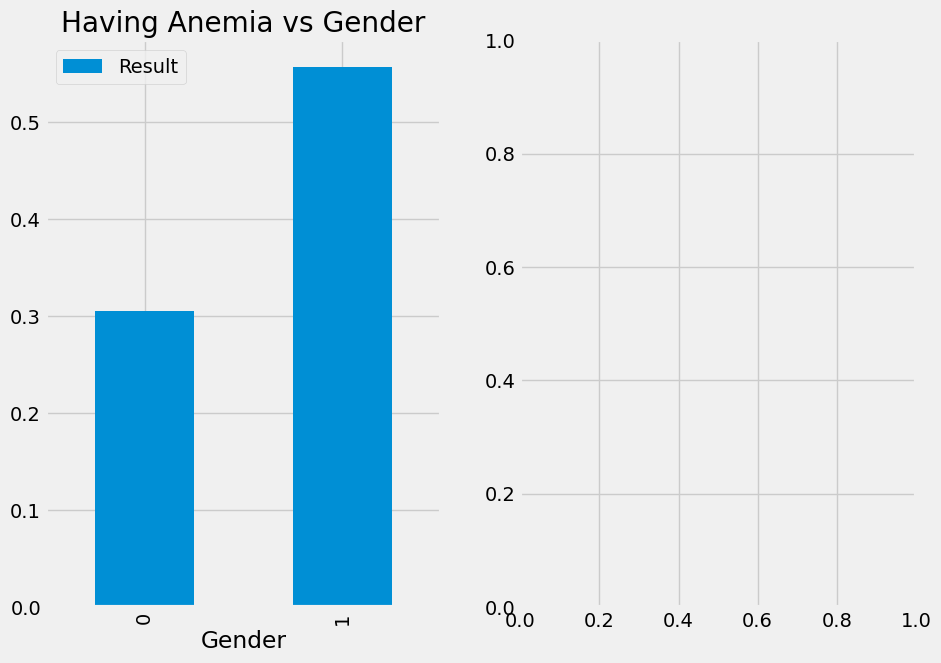

In [174]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['Gender','Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
sns.countplot('Gender',hue='Result',data=data,ax=ax[1])
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()

### Continious Feature: Hemoglobin

In [175]:

print('The highest hemoglobin was of:',data['Hemoglobin'].max())
print('The lowest hemoglobin was of:',data['Hemoglobin'].min())
print('The average hemoglobin in the data:',data['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


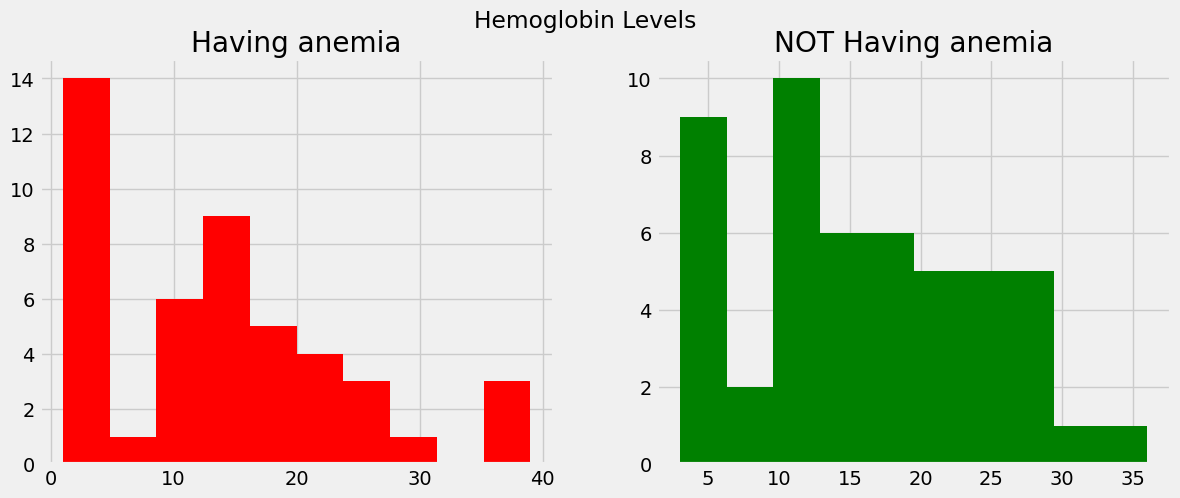

In [176]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

### Continious Feature: MCH 

In [177]:

print('The highest MCH was of:',data['MCH'].max())
print('The lowest MCH was of:',data['MCH'].min())
print('The average MCH in the data:',data['MCH'].mean())

The highest MCH was of: 30.0
The lowest MCH was of: 16.0
The average MCH in the data: 22.90562983814215


<div class="alert alert-block alert-info"> 📌 MCH stands for “mean corpuscular hemoglobin.” An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body</div>

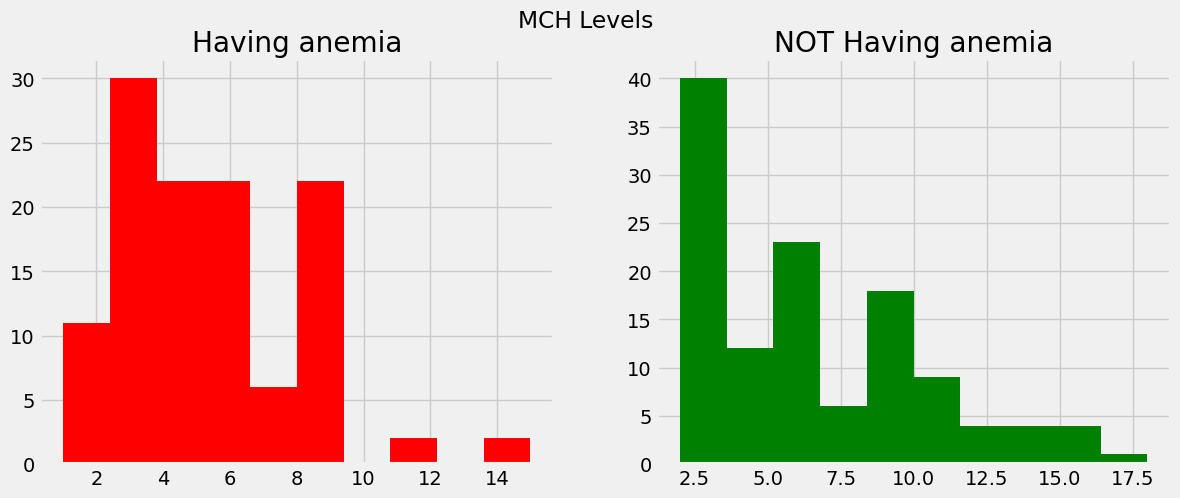

In [178]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['MCH'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['MCH'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCH Levels')
plt.show()

In [179]:
# See the min, max, mean values
print('The highest MCHC was of:',data['MCHC'].max())
print('The lowest MCHC was of:',data['MCHC'].min())
print('The average MCHC in the data:',data['MCHC'].mean())

The highest MCHC was of: 32.5
The lowest MCHC was of: 27.8
The average MCHC in the data: 30.251231527093594


<div class="alert alert-block alert-info"> 📌 A similar measure to MCH is something doctors call "mean corpuscular hemoglobin concentration" (MCHC). MCHC checks the average amount of hemoglobin in a group of red blood cells.</div>

### Continious Feature: MCV (Mean Corpuscular Volume)

In [180]:
# See the min, max, mean values
print('The highest MCV was of:',data['MCV'].max())
print('The lowest MCV was of:',data['MCV'].min())
print('The average MCV in the data:',data['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


<div class="alert alert-block alert-info"> 📌 Mean corpuscular volume (MCV) is a laboratory value that measures the average size and volume of a red blood cell. It has utility in helping determine the etiology of anemia — calculation of the value is by multiplying the percent hematocrit by ten divided by the erythrocyte count.</div>

# 2. Data Cleaning

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

In [181]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()6
fig.set_size_inches(10,8)
plt.show()

SyntaxError: invalid syntax (1287455179.py, line 2)

## Training the model:

In [182]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()
scaled_df

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669
...,...,...,...,...
1416,0.020741,0.028985,0.024703,0.025552
1417,0.023677,0.032294,0.026630,0.026785
1418,0.025633,0.020198,0.024615,0.024874
1419,0.027981,0.018487,0.025841,0.029344


# 3. Predictive Modelling

In [183]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

#### Splitting the data

In [184]:
train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['Result'])
train_X=train[train.columns[:-1]]  #extract every columns except the last one (result)
train_Y=train[train.columns[-1:]] 
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Result']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(1136, 1136, 285, 285)

In [185]:
train_Y #this is the preserved extracted vallue

,Result
778,0
175,1
51,1
333,1
993,0
...,...
394,0
386,1
1304,0
251,0


#### Logistic Regression

In [186]:
LRmodel = LogisticRegression()
LRmodel.fit(train_X,train_Y)
LogReg=LRmodel.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(LogReg,test_Y))

The accuracy of the Logistic Regression is 0.9929824561403509


#### Random Forests

In [187]:
RFmodel=RandomForestClassifier(n_estimators=100)
RFmodel.fit(train_X,train_Y)
RF=RFmodel.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(RF,test_Y))

The accuracy of the Random Forests is 1.0


#### Radial Support Vector Machines(rbf-SVM)

In [188]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
RSVM=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(RSVM,test_Y))

Accuracy for rbf SVM is  0.9859649122807017


#### Linear Support Vector Machine(linear-SVM)

In [189]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
LSVM=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(LSVM,test_Y))

Accuracy for linear SVM is 0.9859649122807017


#### Decision Tree

In [190]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
DT=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(DT,test_Y))

The accuracy of the Decision Tree is 1.0


#### K-Nearest Neighbours(KNN)

In [191]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
Knnmodel=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(Knnmodel,test_Y))

The accuracy of the KNN is 0.9017543859649123


## Predicting output on user given input(trial)

In [204]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [217]:
cdf= data.iloc[: 9]
cdf

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0


In [239]:
fdf=data[(data['MCH']>23) & (data['Result']==1)]
fdf

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
7,1,12.7,28.5,28.2,92.3,1
22,0,6.9,28.1,32.5,94.6,1
24,1,11.0,26.0,32.2,98.9,1
25,1,11.0,25.2,30.9,83.2,1
34,0,11.9,29.5,32.2,87.8,1
...,...,...,...,...,...,...
1396,1,13.0,26.0,31.4,82.8,1
1404,1,11.6,24.6,28.2,96.7,1
1405,0,11.7,24.4,31.5,99.8,1
1416,0,10.6,25.4,28.2,82.9,1


In [201]:
trial= [[1,14,22,30,89]]


In [202]:
RFmodel.predict(trial)

array([0])

In [203]:
LRmodel.predict(trial)

array([0])

### Cross Validation

In [196]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10) 
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.994366,0.008213
Radial Svm,0.902191,0.019214
Logistic Regression,0.991554,0.007586
KNN,0.900079,0.028450
Decision Tree,1.000000,0.000000
Naive Bayes,0.938782,0.023560
Random Forest,1.000000,0.000000


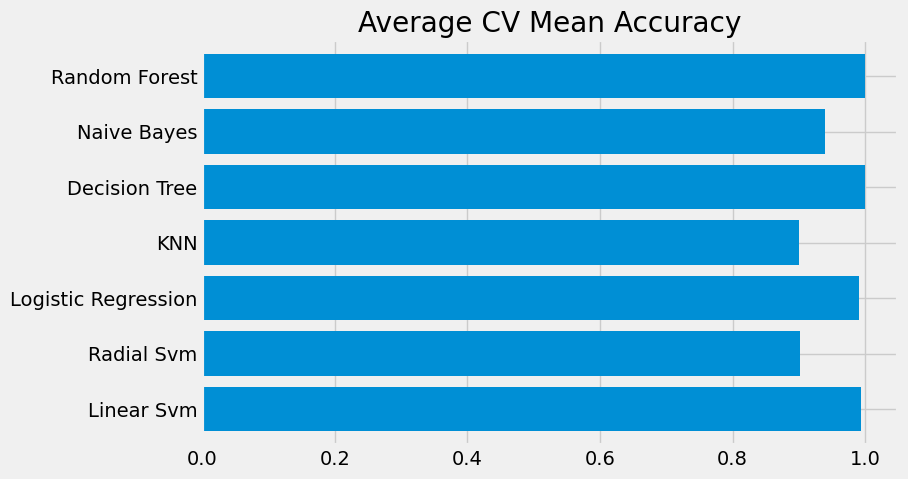

In [61]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()